## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

목적
* 키,몸무게를 이용해서 비만도(BMI)변수(경도 비만 등 그룹화) 생성
* 시도별 서울권, 지방권으로 그룹화 해서 건강상태 비교해보기

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 변경될 사항 등을 알려주는 경고 메시지 무시하고 숨김
import warnings
warnings.filterwarnings('ignore')

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

In [2]:
# 인코딩 에러(한글이 들어간 파일의 인코딩 에러 해결)
df=pd.read_csv('/Users/supersong/Documents/python/data/nhis_nhcp_info_20211229.csv',encoding='cp949')

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [3]:
# 데이터 모양 확인
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
# 데이터 모양 확인(100만개의 행과 31개의 열로 이루어져있음.)
df.shape

(1000000, 31)

In [5]:
# 컬럼명이 한글(한글이 깨질 수도 있기 때문에 컬럼명을 영어로 변경)
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [6]:
# 컬럼명을 영어로 변경
df.columns=['HCHK_YEAR','IDV_ID','SIDO','SEX','AGE_GROUP','HEIGHT',
           'WEIGHT','WAIST','SIGHT_LEFT','SIGHT_RIGHT','HEAR_LEFT',
           'HEAR_RIGHT','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','TRIGLYCERIDE',
           'HDL_CHOLE','LDL_CHOLE','HMG','OLIG_PROTE_CD','CREATININE',
           'SGOT_AST','SGPT_ALT','GAMMA_GTP','SMK_STAT_TYPE_CD','DRK_YN',
           'HCHK_OE_INSPEC_YN','CRS_YN','TTR_YN','DATA_STD_DT']

In [7]:
# 컬럼명 변경됨 확인
df.head(2)

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [8]:
df.head()

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


9개의 컬럼 제외한 모든 컬럼에 결측치가 존재하고 결측치가 많은 컬럼은 반 이상이 결측치임.

In [9]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999892 non-null   float64
 8   SIGHT_LEFT         999743 non-null   float64
 9   SIGHT_RIGHT        999748 non-null   float64
 10  HEAR_LEFT          999778 non-null   float64
 11  HEAR_RIGHT         999770 non-null   float64
 12  BP_HIGH            992468 non-null   float64
 13  BP_LWST            992466 non-null   float64
 14  BLDS               992398 non-null   float64
 15  TOT_CHOLE          402306 non-nul

6개의 컬럼이 전체 데이터의 50프로 이상이 결측치이고 나머지는 1프로 미만이 대부분임.

In [10]:
# 컬럼별로 결측치의 개수(count)와 비율(percent) 확인
missing_df=df.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['percent']=round((missing_df['count']/df.shape[0])*100,2)
missing_df.loc[missing_df['percent']!=0].sort_values('count')

,column,count,percent
7,WAIST,108,0.01
26,DRK_YN,196,0.02
10,HEAR_LEFT,222,0.02
11,HEAR_RIGHT,230,0.02
9,SIGHT_RIGHT,252,0.03
8,SIGHT_LEFT,257,0.03
25,SMK_STAT_TYPE_CD,343,0.03
12,BP_HIGH,7532,0.75
13,BP_LWST,7534,0.75
22,SGOT_AST,7601,0.76


### 04. 기술통계량 계산하기 Descriptive Statistics
- 데이터셋을 요약하기 위해 일부 기술통계량을 계산합니다.

HCHK_YEAR(기준년도): 해당 정보의 기준년도가 전부 2020년임.
SEX(성별): 남성과 여성의 비율이 비슷하지만 남성이 더 많음.
AGE_GROUP(연령대코드(5세단위)): 수진자의 연령이 40에서 85세 이상이며 50에서 59세가 주를 이룰 것으로 예상.
WAIST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,GAMMA_GTP,SGPT_ALT,SGOT_AST,CREATININE 컬럼은 이상치 의심해야함.

In [11]:
print(df.describe())

       HCHK_YEAR          IDV_ID            SIDO             SEX  \
count  1000000.0  1000000.000000  1000000.000000  1000000.000000   
mean      2020.0   500000.500000       34.047725        1.489311   
std          0.0   288675.278933       12.443883        0.499886   
min       2020.0        1.000000       11.000000        1.000000   
25%       2020.0   250000.750000       27.000000        1.000000   
50%       2020.0   500000.500000       41.000000        1.000000   
75%       2020.0   750000.250000       44.000000        2.000000   
max       2020.0  1000000.000000       49.000000        2.000000   

            AGE_GROUP          HEIGHT          WEIGHT          WAIST  \
count  1000000.000000  1000000.000000  1000000.000000  999892.000000   
mean        11.917757      160.964085       63.060790      82.357094   
std          2.171036        9.197899       12.269907       9.622632   
min          9.000000      130.000000       30.000000       5.800000   
25%         10.000000      

In [61]:
# 데이터 타입별 value값 개수, 유니크한 value값의 개수
for col in df.select_dtypes('object').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('------------------------------')

DATA_STD_DT
유니크값 개수 : 1
------------------------------
FATNESS
유니크값 개수 : 6
------------------------------
OBESITY
유니크값 개수 : 2
------------------------------


In [62]:
for col in df.select_dtypes('int64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('------------------------------')

HCHK_YEAR
유니크값 개수 : 1
------------------------------
IDV_ID
유니크값 개수 : 1000000
------------------------------
SIDO
유니크값 개수 : 17
------------------------------
SEX
유니크값 개수 : 2
------------------------------
AGE_GROUP
유니크값 개수 : 10
------------------------------
HEIGHT
유니크값 개수 : 14
------------------------------
WEIGHT
유니크값 개수 : 22
------------------------------
HCHK_OE_INSPEC_YN
유니크값 개수 : 2
------------------------------


In [63]:
for col in df.select_dtypes('float64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :', df[col].nunique())
    print('------------------------------')

WAIST
유니크값 개수 : 777
------------------------------
SIGHT_LEFT
유니크값 개수 : 24
------------------------------
SIGHT_RIGHT
유니크값 개수 : 24
------------------------------
HEAR_LEFT
유니크값 개수 : 3
------------------------------
HEAR_RIGHT
유니크값 개수 : 3
------------------------------
BP_HIGH
유니크값 개수 : 174
------------------------------
BP_LWST
유니크값 개수 : 126
------------------------------
BLDS
유니크값 개수 : 491
------------------------------
TOT_CHOLE
유니크값 개수 : 429
------------------------------
TRIGLYCERIDE
유니크값 개수 : 1329
------------------------------
HDL_CHOLE
유니크값 개수 : 340
------------------------------
LDL_CHOLE
유니크값 개수 : 362
------------------------------
HMG
유니크값 개수 : 196
------------------------------
OLIG_PROTE_CD
유니크값 개수 : 6
------------------------------
CREATININE
유니크값 개수 : 188
------------------------------
SGOT_AST
유니크값 개수 : 580
------------------------------
SGPT_ALT
유니크값 개수 : 637
------------------------------
GAMMA_GTP
유니크값 개수 : 971
------------------------------
SMK_STAT_TYPE_CD
유니크값 개수 :

목적1. WEIGHT,HEIGHT,WAIST,SEX를 이용해서 RISK 컬럼 생성

In [15]:
# 'BMI(체질량지수)'컬럼 생성(WEIGHT,HEIGHT컬럼 활용)
df['BMI']=round(df['WEIGHT']/(df['HEIGHT']*df['HEIGHT'])*10000,2)

In [16]:
# 'FATNESS(비만도)'컬럼 생성(BMI컬럼 활용/대한비만학회 비만 진료지침 2022기준/남녀공통)
df['FATNESS']=np.nan

df['FATNESS'].loc[df['BMI']<18.5]='저체중' 
df['FATNESS'].loc[(df['BMI']>=18.5) & (df['BMI']<23.0)]='정상체중'
df['FATNESS'].loc[(df['BMI']>=23.0) & (df['BMI']<25.0)]='과체중'
df['FATNESS'].loc[(df['BMI']>=25.0) & (df['BMI']<30.0)]='경도비만'
df['FATNESS'].loc[(df['BMI']>=30.0) & (df['BMI']<35.0)]='중등도비만'
df['FATNESS'].loc[df['BMI']>=35.0]='고도비만'

In [17]:
# 'OBESITY(복부비만)'컬럼 생성(WAIST,SEX컬럼 활용/대한비만학회 비만 진료지침 2022기준/남녀분리)
df['OBESITY']=np.nan

df['OBESITY'].loc[(df['WAIST']<90)&(df['SEX']==1)]='정상'
df['OBESITY'].loc[(df['WAIST']>=90)&(df['SEX']==1)]='복부비만'
df['OBESITY'].loc[(df['WAIST']<85)&(df['SEX']==2)]='정상'
df['OBESITY'].loc[(df['WAIST']>=85)&(df['SEX']==2)]='복부비만'

In [18]:
# FATNESS와 OBESITY에 따른 RISK(비만 동반 질환 위험도)컬럼 생성(대한비만학회 비만 진료지침 2022기준/남녀공통)
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
df['RISK']=np.nan

df['RISK'].loc[(df['FATNESS']=='저체중')&(df['OBESITY']=='정상')]=1
df['RISK'].loc[(df['FATNESS']=='정상체중')&(df['OBESITY']=='정상')]=2
df['RISK'].loc[(df['FATNESS']=='과체중')&(df['OBESITY']=='정상')]=3
df['RISK'].loc[(df['FATNESS']=='경도비만')&(df['OBESITY']=='정상')]=4
df['RISK'].loc[(df['FATNESS']=='중등도비만')&(df['OBESITY']=='정상')]=5
df['RISK'].loc[(df['FATNESS']=='고도비만')&(df['OBESITY']=='정상')]=6

df['RISK'].loc[(df['FATNESS']=='저체중')&(df['OBESITY']=='복부비만')]=2
df['RISK'].loc[(df['FATNESS']=='정상체중')&(df['OBESITY']=='복부비만')]=3
df['RISK'].loc[(df['FATNESS']=='과체중')&(df['OBESITY']=='복부비만')]=4
df['RISK'].loc[(df['FATNESS']=='경도비만')&(df['OBESITY']=='복부비만')]=5
df['RISK'].loc[(df['FATNESS']=='중등도비만')&(df['OBESITY']=='복부비만')]=6
df['RISK'].loc[(df['FATNESS']=='고도비만')&(df['OBESITY']=='복부비만')]=6

In [19]:
# RISK의 value에 따른 개수
df['RISK'].value_counts().sort_index(ascending=True)

1.0     35051
2.0    357425
3.0    200406
4.0    180231
5.0    175902
6.0     50877
Name: RISK, dtype: int64

### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

SEX(성별): 남성과 여성의 비율이 비슷하지만 남성이 조금 더 많음.

<AxesSubplot:xlabel='SEX', ylabel='count'>

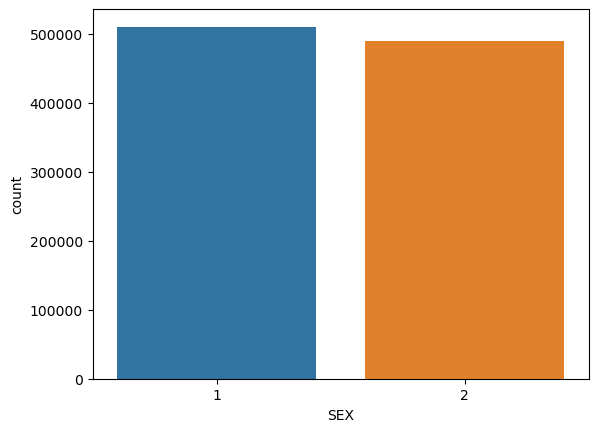

In [20]:
sns.countplot(df['SEX'])

AGE_GROUP(연령대코드(5세단위)): 40에서 69세가 주를 이루며 50에서 54세 그룹이 가장 많음.(40세 미만은 대상이 아님.)

<AxesSubplot:xlabel='AGE_GROUP', ylabel='Count'>

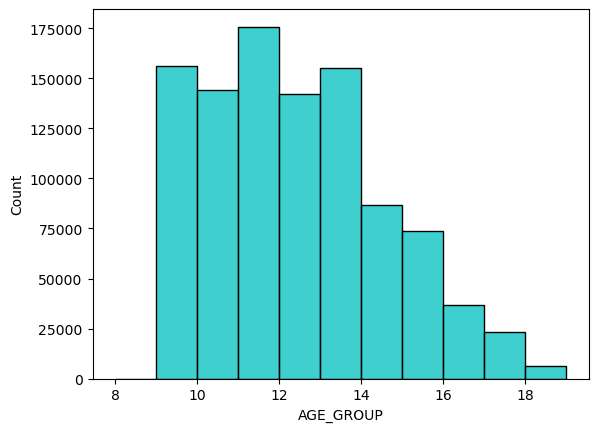

In [21]:
sns.histplot(df['AGE_GROUP'],bins=range(8,20,1),color='c', edgecolor='k')

SIGHT_LEFT(시력(좌)): 시력 범위가 0.1~2.5인데 9.9인 데이터(실명)를 어떻게 처리할지 생각.(3700개 정도 있음)

SIGHT_RIGHT(시력(우)): 시력 범위가 0.1~2.5인데 9.9인 데이터(실명)를 어떻게 처리할지 생각.(3800개 정도 있음)
-> 9.9이면 시력이 좋은 것으로 설명이 될거같아서 실명인 데이터를 0.0으로 대체하는것이 좋아보임.

<AxesSubplot:xlabel='SIGHT_RIGHT'>

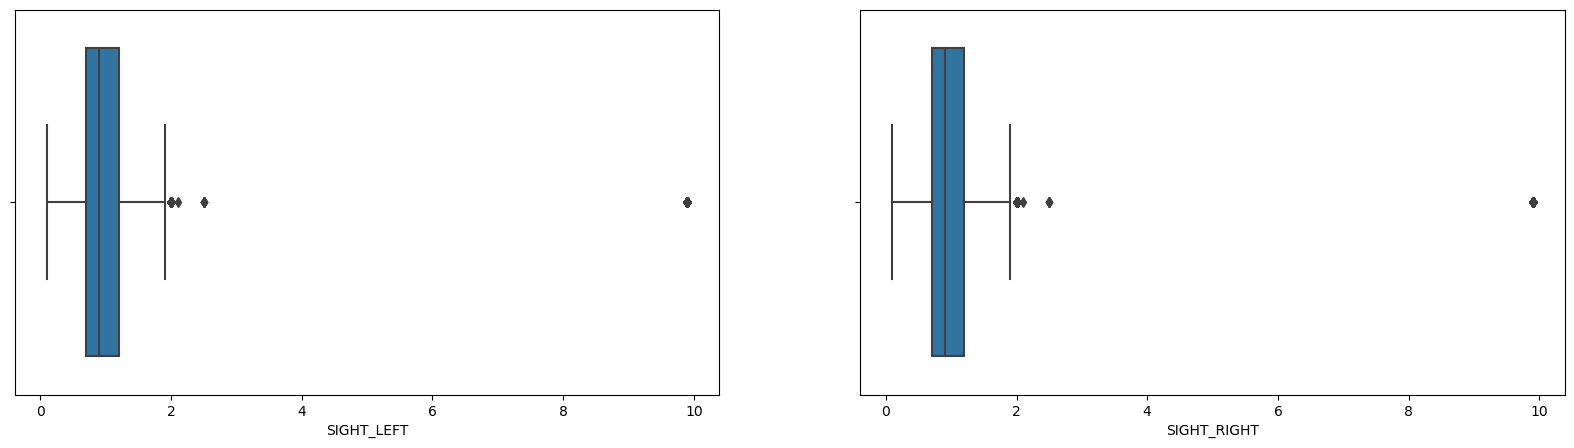

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df['SIGHT_LEFT'])
plt.subplot(1,2,2)
sns.boxplot(df['SIGHT_RIGHT'])

 HEAR_LEFT(청력(좌)): (정상:1,비정상:0)인데 3인 데이터는 무엇을 의미하는지, 어떻게 처리할지 생각.(1700건 정도 있음)
HEAR_RIGHT(청력(우)): (정상:1,비정상:0)인데 3인 데이터는 무엇을 의미하는지, 어떻게 처리할지 생각.(1500건 정도 있음)

<AxesSubplot:xlabel='HEAR_RIGHT', ylabel='count'>

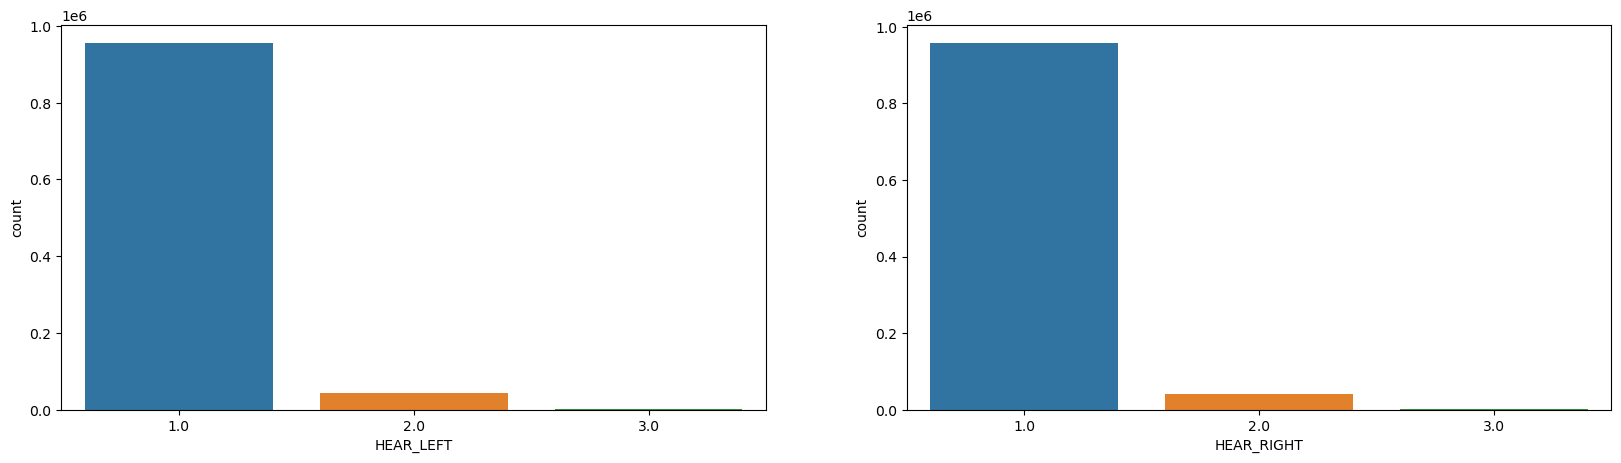

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df['HEAR_LEFT'])
plt.subplot(1,2,2)
sns.countplot(df['HEAR_RIGHT'])

TTR_YN(치석): 해당 수검자의 치석 여부(있음:1,없음:0)인데 2인 데이터는 무엇을 의미하는지, 어떻게 처리할지 생각.(17000건 정도 있음)

<AxesSubplot:xlabel='TTR_YN', ylabel='count'>

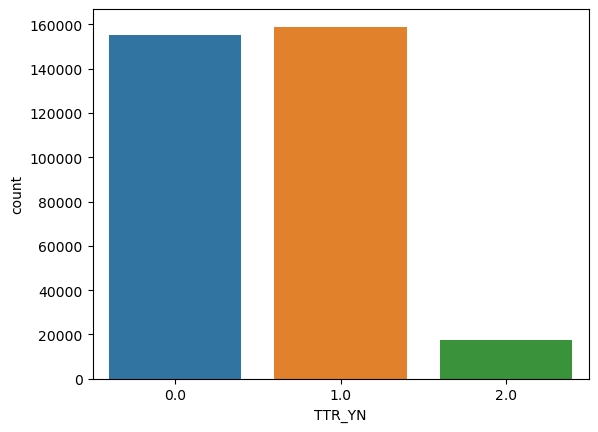

In [24]:
sns.countplot(df['TTR_YN'])

WAIST(허리둘레): 146까지는 존재할 수도 있겠지만 680, 999와 같은 수치는 이상치임.

<AxesSubplot:xlabel='WAIST'>

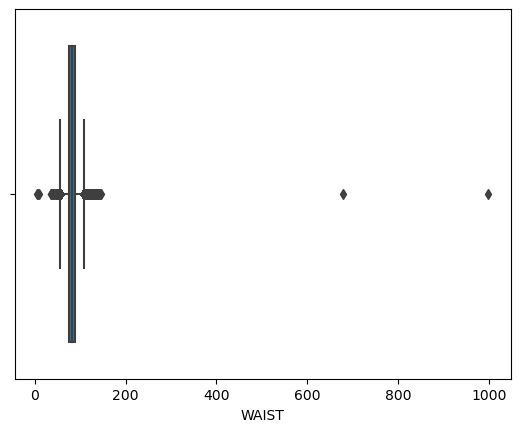

In [25]:
sns.boxplot(df['WAIST'])

BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,GAMMA_GTP,SGPT_ALT,SGOT_AST,CREATININE 컬럼은 이상치 의심.
각 데이터의 특성을 파악하여 이상치의 범위를 어떻게 잡아야할지 생각. 

<AxesSubplot:xlabel='CREATININE'>

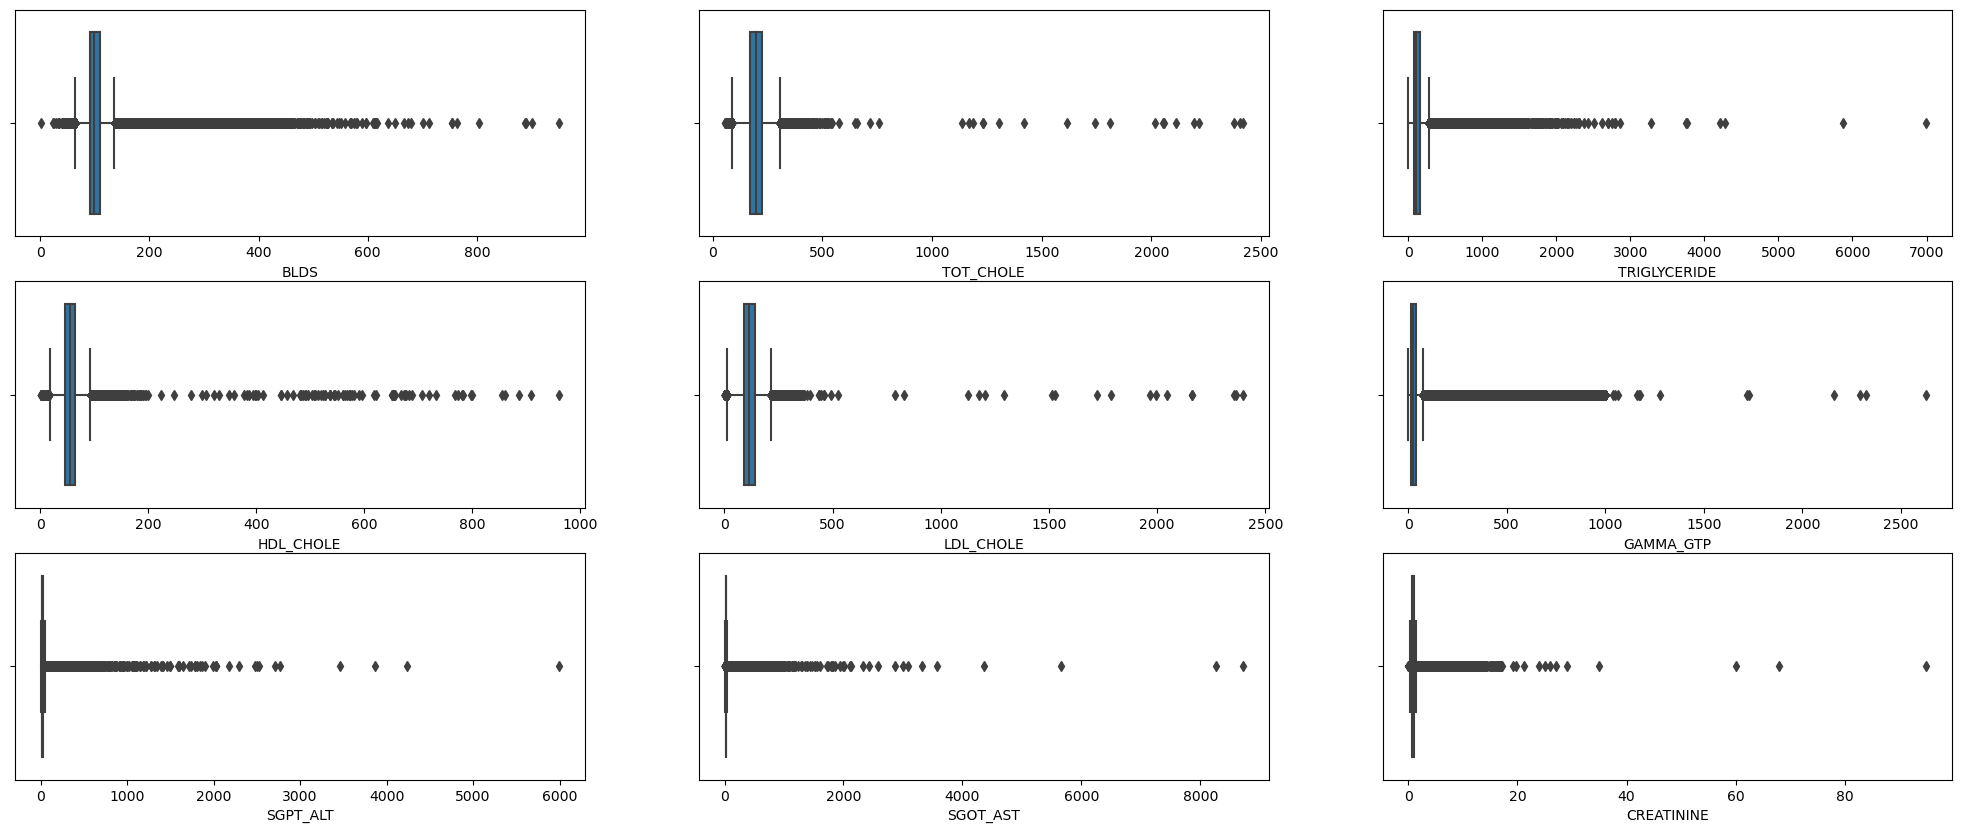

In [26]:
plt.figure(figsize=(25,10))

plt.subplot(3,3,1)
sns.boxplot(df['BLDS'])
plt.subplot(3,3,2)
sns.boxplot(df['TOT_CHOLE'])
plt.subplot(3,3,3)
sns.boxplot(df['TRIGLYCERIDE'])
plt.subplot(3,3,4)
sns.boxplot(df['HDL_CHOLE'])
plt.subplot(3,3,5)
sns.boxplot(df['LDL_CHOLE'])
plt.subplot(3,3,6)
sns.boxplot(df['GAMMA_GTP'])
plt.subplot(3,3,7)
sns.boxplot(df['SGPT_ALT'])
plt.subplot(3,3,8)
sns.boxplot(df['SGOT_AST'])
plt.subplot(3,3,9)
sns.boxplot(df['CREATININE'])

파생변수 RISK(비만 동반 질환 위험도): 위험도가 2~5에 주로 분포하고 2가 가장 많음.

<AxesSubplot:xlabel='RISK', ylabel='count'>

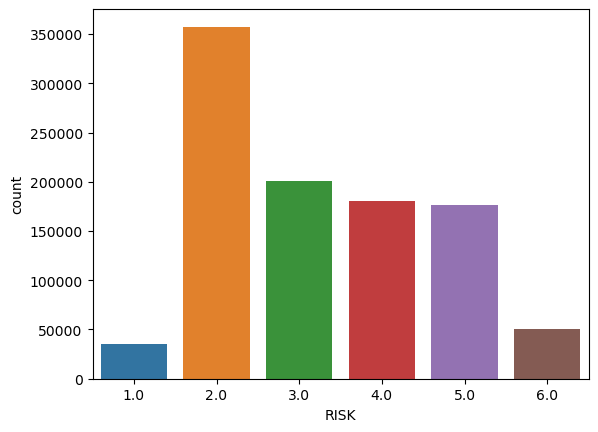

In [27]:
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
sns.countplot(df['RISK'])

종속변수 RISK의 분포 확인 -> 2,3,4,5에 주로 분포되어있으며 2가 가장 많음

<AxesSubplot:xlabel='RISK', ylabel='Count'>

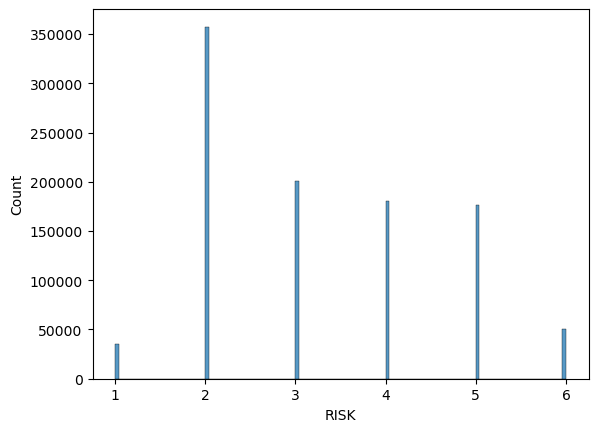

In [28]:
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
sns.histplot(df['RISK'])

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

RISK 변수가 비만 동반 질환 위험도이기 때문에 몸무게가 많이 나갈수록 높은 점수의 비율이 증가하는 것을 볼수있다.

<AxesSubplot:xlabel='WEIGHT', ylabel='Count'>

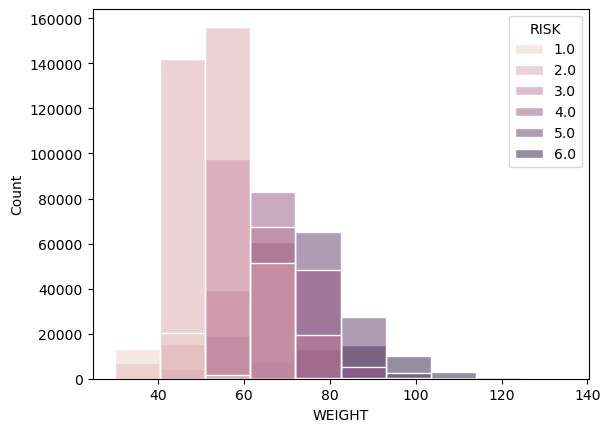

In [29]:
# X(수치형)-Y(범주형)
sns.histplot(x='WEIGHT', data=df, hue='RISK', bins=10, edgecolor='WHITE')

남성이 여성보다 높은 RISK점수(3~6)의 비율이 더 많음을 확인할 수 있다.

RISK   1.0    2.0    3.0    4.0    5.0   6.0
SEX                                         
1     2.24  27.45  21.36  21.74  21.93  5.28
2     4.83  44.40  18.66  14.15  13.07  4.89


<AxesSubplot:xlabel='SEX'>

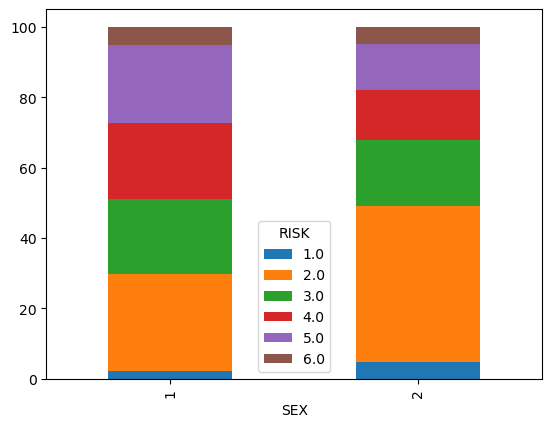

In [30]:
temp = round(pd.crosstab(df['SEX'], df['RISK'], normalize='index')*100,2)
print(temp)
temp.plot.bar(stacked=True)

술 안마시는 집단(0)보다 마시는 집단(1)의 높은 RISK점수(3~6)의 비율이 더 많음을 확인할 수 있다.

RISK   1.0    2.0    3.0    4.0    5.0   6.0
SEX                                         
1     2.24  27.45  21.36  21.74  21.93  5.28
2     4.83  44.40  18.66  14.15  13.07  4.89


<AxesSubplot:xlabel='DRK_YN'>

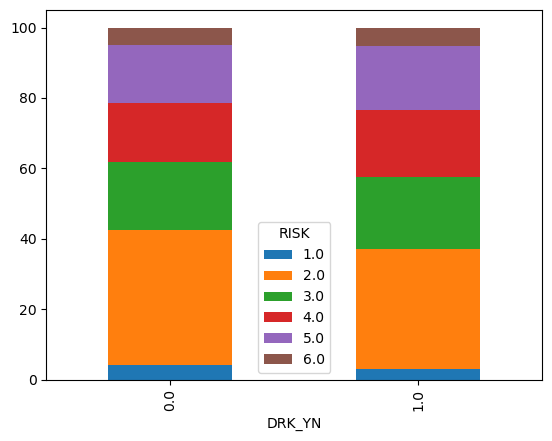

In [31]:
# X(범주형)-Y(범주형)
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
temp2 = round(pd.crosstab(df['DRK_YN'], df['RISK'], normalize='index')*100,2)
print(temp)
temp2.plot.bar(stacked=True)

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

히트맵(상관관계 분석)

BMI,WEIGHT,WAIST,BP_HIGH,TRIGLYCERIDE,BP_LWST,HMG.. 순으로 종속변수인 RISK와 상관관계가 높다. 

In [32]:
df_corr=df.iloc[:,2:]

<AxesSubplot:>

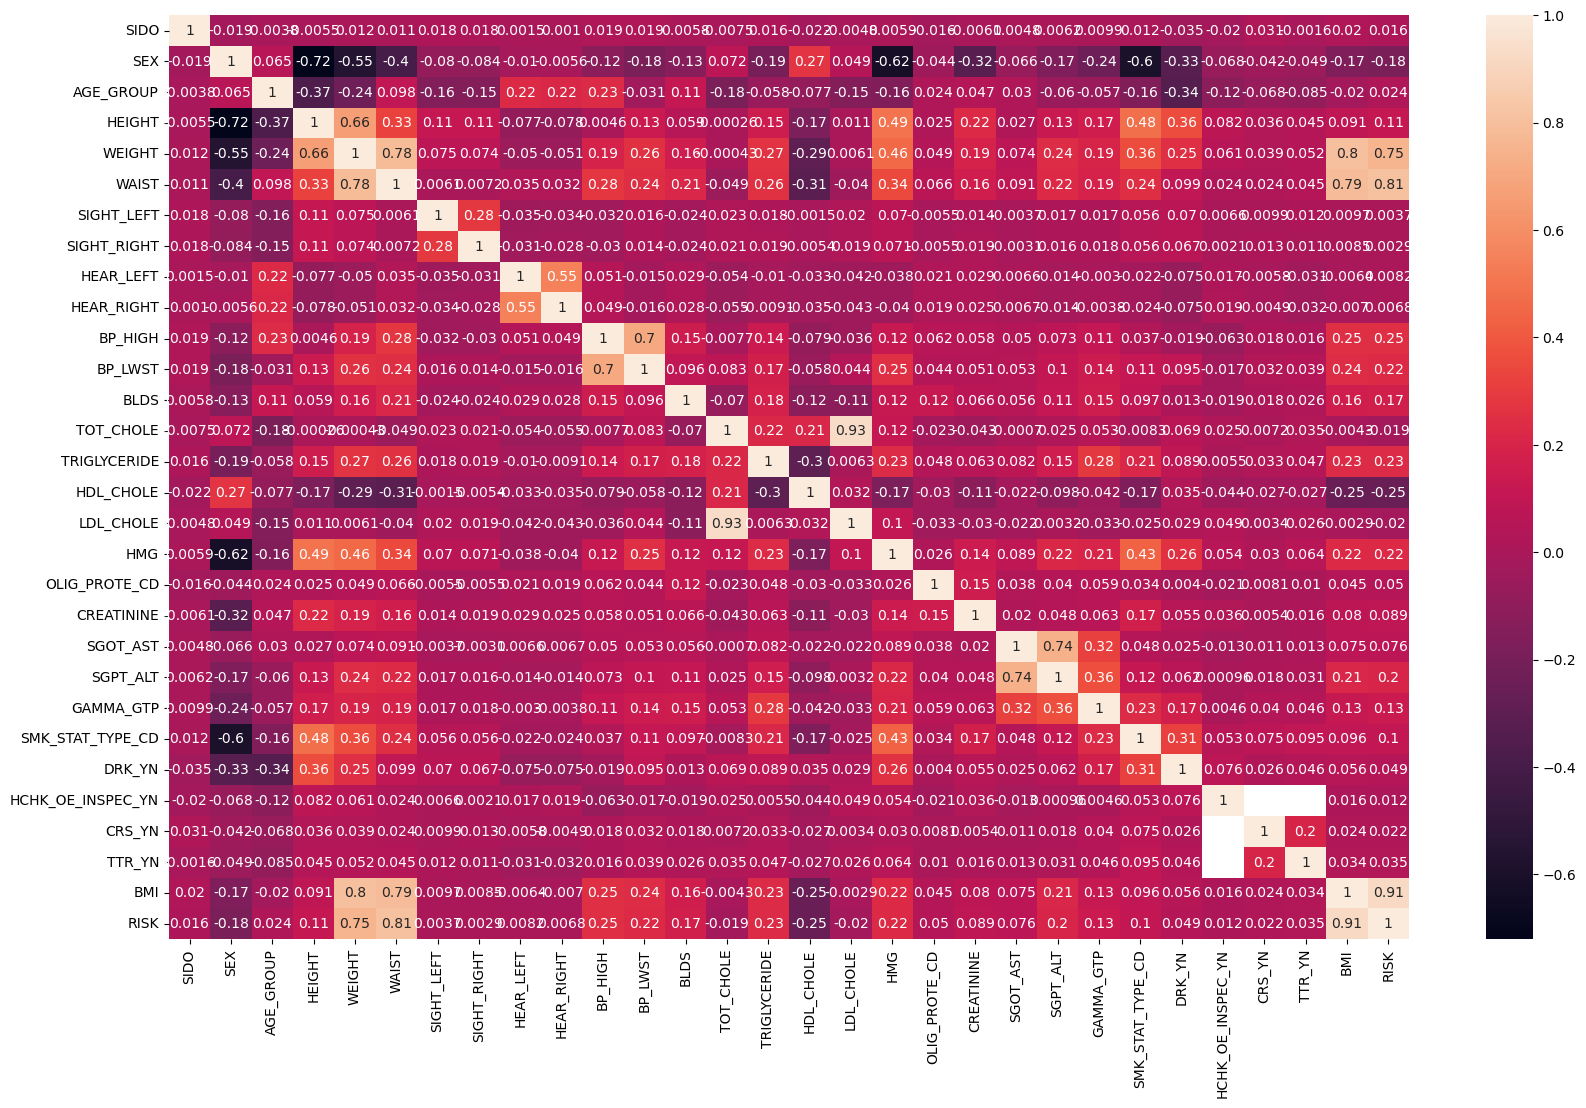

In [33]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr.corr(), annot=True)

로지스틱 회귀분석

In [55]:
# 독립/종속 변수
df_drop=df.dropna()
X=df_drop.iloc[:,2:30]
Y=df_drop.iloc[:,-1]

# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)

y_test_predict=LR.predict(x_test)

# 평가
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(y_test, y_test_predict)
confusion=confusion_matrix(y_test, y_test_predict)

print('정확도 :', accuracy)
print('오차행렬 :')
print(confusion)

정확도 : 0.7453135786734639
오차행렬 :
[[    4  1266     0     0     0     0]
 [   89 12317  1131     2     0     0]
 [   36  1550  5306   718   102     0]
 [    2     9  1322  4163  1162     8]
 [    1     1    11  1272  4851   418]
 [    0     0     0     3   489  1429]]
